In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

In [17]:
data=pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/galaxy.csv")
data

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,NaN,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,NaN,NaN,Galaxy_Note9,contains description,0,0,0
2,0,199.99,NaN,NaN,Unknown,no description,100,2,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,contains description,0,0,1
4,1,100.00,NaN,Space Gray,Galaxy_S8,contains description,0,0,1
...,...,...,...,...,...,...,...,...,...
1480,0,89.50,AT&T,NaN,Galaxy_S7,no description,96,2,0
1481,0,239.95,NaN,Midnight Black,Galaxy_S9,no description,97,5,1
1482,0,329.99,NaN,Space Gray,Galaxy_Note10,no description,93,1,0
1483,0,89.00,NaN,Midnight Black,Galaxy_S7,no description,92,2,1


In [18]:
data[data['productline']=='Unknown']

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
2,0,199.99,NaN,NaN,Unknown,no description,100,2,0
18,0,329.99,NaN,Space Gray,Unknown,contains description,0,0,0
56,0,319.00,NaN,Gold,Unknown,contains description,0,0,0
75,0,193.15,NaN,NaN,Unknown,contains description,0,0,0
108,1,100.00,NaN,NaN,Unknown,no description,33,4,1
...,...,...,...,...,...,...,...,...,...
1456,0,289.00,NaN,NaN,Unknown,no description,101,4,0
1465,1,52.25,NaN,NaN,Unknown,contains description,0,0,0
1467,0,87.00,NaN,NaN,Unknown,contains description,0,0,0
1477,0,279.00,NaN,NaN,Unknown,contains description,0,0,0


In [19]:
data.isnull().sum()

BuyItNow                   0
startprice                 0
carrier                 1169
color                    593
productline                0
noDescription              0
charCountDescription       0
upperCaseDescription       0
sold                       0
dtype: int64

In [20]:
data.isna().sum()/len(data)*100

BuyItNow                 0.000000
startprice               0.000000
carrier                 78.720539
color                   39.932660
productline              0.000000
noDescription            0.000000
charCountDescription     0.000000
upperCaseDescription     0.000000
sold                     0.000000
dtype: float64

In [21]:
data.describe()

,BuyItNow,startprice,charCountDescription,upperCaseDescription,sold
count,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000
mean,0.449158,216.844162,31.184512,2.863300,0.461953
std,0.497576,172.893308,41.744518,9.418585,0.498718
min,0.000000,0.010000,0.000000,0.000000,0.000000
25%,0.000000,80.000000,0.000000,0.000000,0.000000
50%,0.000000,198.000000,0.000000,0.000000,0.000000
75%,1.000000,310.000000,79.000000,2.000000,1.000000
max,1.000000,999.000000,111.000000,81.000000,1.000000


In [22]:
data['carrier'].unique()

array([nan, 'AT&T', 'Sprint/T-Mobile', 'Verizon'], dtype=object)

In [12]:
# 약79%가 결측값이기 때문에 삭제
data=data.drop(columns=['carrier'],axis=1) 

In [13]:
data

,BuyItNow,startprice,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,NaN,Galaxy_Note9,contains description,0,0,0
2,0,199.99,NaN,Unknown,no description,100,2,0
3,1,175.00,Space Gray,Galaxy_Note9,contains description,0,0,1
4,1,100.00,Space Gray,Galaxy_S8,contains description,0,0,1
...,...,...,...,...,...,...,...,...
1480,0,89.50,NaN,Galaxy_S7,no description,96,2,0
1481,0,239.95,Midnight Black,Galaxy_S9,no description,97,5,1
1482,0,329.99,Space Gray,Galaxy_Note10,no description,93,1,0
1483,0,89.00,Midnight Black,Galaxy_S7,no description,92,2,1


In [14]:
productline_color_crosstab = pd.crosstab(data['productline'], data['color'])


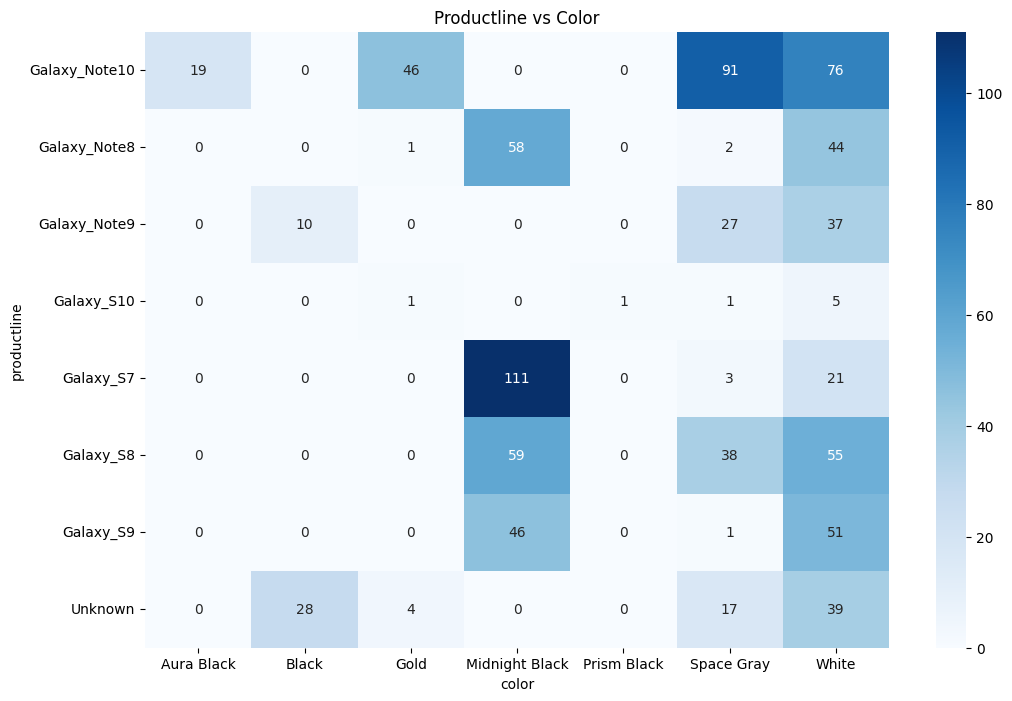

In [15]:
# 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(productline_color_crosstab, annot=True, fmt='d', cmap='Blues')
plt.title('Productline vs Color')
plt.show()


In [ ]:
# productline별로 color 최빈값으로 채움
data['color'] = data.groupby('productline')['color'].transform(lambda x: x.fillna(x.mode()[0]))